<a href="https://colab.research.google.com/github/DhananjayD24/Machine_Learning/blob/main/Linear_Regression/Polynomial_regression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

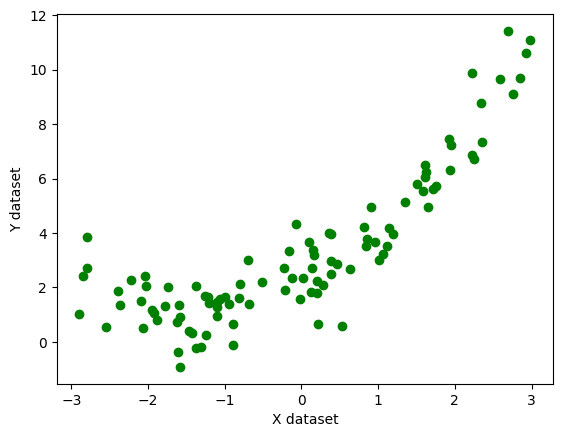

In [ ]:
X = 6 * np.random.rand(100,1) -3 #random generates flots [0,1). it will generate 100 rows and 1 column
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)   #making output quadrating so it will become non linear function
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [ ]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score) # later we will compare this score with the score of polynomial regression

0.7436051842746679


Text(0, 0.5, 'Y')

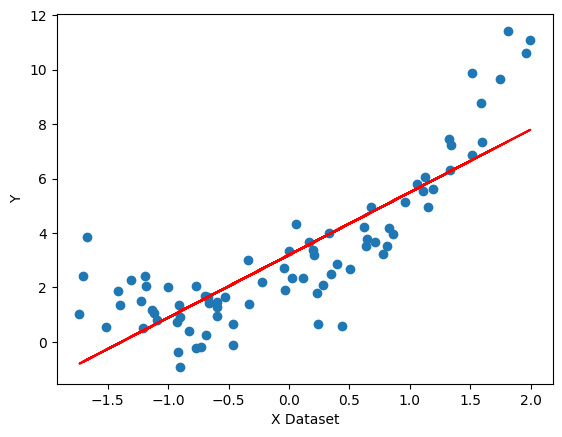

In [ ]:
## Lets visualize this model
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [ ]:
#Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=2,include_bias=True)  # include_bias=true means it will take coefficient of X^0 too (equation: h(x)= BX^0 + BX^1 + B^2). we kepts degree=2.
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [ ]:
X_train_poly  #first column =  X^0, second column =  X^1, third column = X^2

array([[ 1.00000000e+00,  2.05338109e-01,  4.21637391e-02],
       [ 1.00000000e+00,  1.59995941e+00,  2.55987011e+00],
       [ 1.00000000e+00,  7.77893983e-01,  6.05119049e-01],
       [ 1.00000000e+00, -9.30424622e-01,  8.65689977e-01],
       [ 1.00000000e+00, -1.92225463e-03,  3.69506286e-06],
       [ 1.00000000e+00, -6.58837874e-01,  4.34067345e-01],
       [ 1.00000000e+00,  1.59221061e+00,  2.53513463e+00],
       [ 1.00000000e+00, -4.63486776e-01,  2.14819991e-01],
       [ 1.00000000e+00,  1.14815479e+00,  1.31825942e+00],
       [ 1.00000000e+00, -1.00466893e+00,  1.00935966e+00],
       [ 1.00000000e+00, -5.26719350e-01,  2.77433273e-01],
       [ 1.00000000e+00, -1.22156807e+00,  1.49222855e+00],
       [ 1.00000000e+00,  6.09527593e-02,  3.71523887e-03],
       [ 1.00000000e+00, -4.09456518e-02,  1.67654640e-03],
       [ 1.00000000e+00,  8.27988074e-01,  6.85564251e-01],
       [ 1.00000000e+00,  6.20042503e-01,  3.84452705e-01],
       [ 1.00000000e+00,  1.32179177e+00

In [ ]:
X_test_poly  #first column =  X^0, second column =  X^1, third column = X^2

array([[ 1.        , -0.40186348,  0.16149425],
       [ 1.        ,  1.84980004,  3.42176017],
       [ 1.        , -0.4107426 ,  0.16870948],
       [ 1.        ,  0.34858383,  0.12151068],
       [ 1.        , -1.02651104,  1.05372492],
       [ 1.        ,  0.23275443,  0.05417463],
       [ 1.        , -0.56900601,  0.32376784],
       [ 1.        , -0.80421293,  0.64675844],
       [ 1.        ,  1.21985339,  1.48804229],
       [ 1.        ,  0.7418623 ,  0.55035966],
       [ 1.        , -0.49929842,  0.24929891],
       [ 1.        ,  1.53012698,  2.34128857],
       [ 1.        ,  0.09457926,  0.00894524],
       [ 1.        ,  0.34362532,  0.11807836],
       [ 1.        , -1.67427262,  2.80318881],
       [ 1.        ,  0.18168725,  0.03301026],
       [ 1.        ,  1.12576055,  1.26733682],
       [ 1.        ,  1.91272196,  3.6585053 ],
       [ 1.        ,  1.13542135,  1.28918165],
       [ 1.        ,  0.19013056,  0.03614963]])

In [ ]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)   #applying polynomial regression

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test_poly) #predicted values through polynomial regression

In [ ]:
score=r2_score(y_test,y_pred)
print(score)       #see score is improved significantly when we applied polynomial regression than the score of linear regression.

0.9285901462556612


In [ ]:
print(regression.coef_)   # coefficients of X^1 and X^2

[[0.         2.06359    1.28849573]]


In [ ]:
print(regression.intercept_) # when X=0 that is coefficient of X^0

[1.90586724]


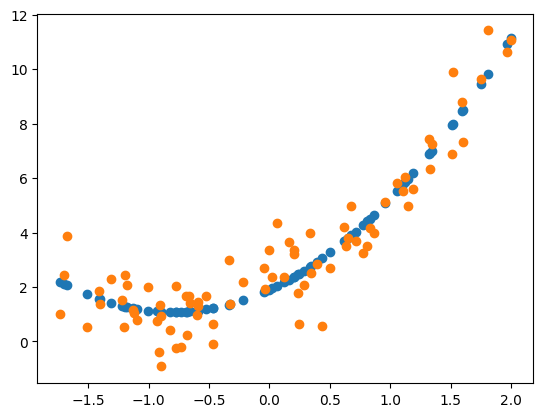

In [ ]:
plt.scatter(X_train,regression.predict(X_train_poly))   #Blue line is best fit line
plt.scatter(X_train,y_train)

In [ ]:
poly=PolynomialFeatures(degree=3,include_bias=True)   # lets try with degree = 3. and compare score
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [ ]:
X_train_poly

array([[ 1.00000000e+00,  2.05338109e-01,  4.21637391e-02,
         8.65782245e-03],
       [ 1.00000000e+00,  1.59995941e+00,  2.55987011e+00,
         4.09568826e+00],
       [ 1.00000000e+00,  7.77893983e-01,  6.05119049e-01,
         4.70718467e-01],
       [ 1.00000000e+00, -9.30424622e-01,  8.65689977e-01,
        -8.05459269e-01],
       [ 1.00000000e+00, -1.92225463e-03,  3.69506286e-06,
        -7.10285169e-09],
       [ 1.00000000e+00, -6.58837874e-01,  4.34067345e-01,
        -2.85980007e-01],
       [ 1.00000000e+00,  1.59221061e+00,  2.53513463e+00,
         4.03646826e+00],
       [ 1.00000000e+00, -4.63486776e-01,  2.14819991e-01,
        -9.95662250e-02],
       [ 1.00000000e+00,  1.14815479e+00,  1.31825942e+00,
         1.51356587e+00],
       [ 1.00000000e+00, -1.00466893e+00,  1.00935966e+00,
        -1.01407229e+00],
       [ 1.00000000e+00, -5.26719350e-01,  2.77433273e-01,
        -1.46129473e-01],
       [ 1.00000000e+00, -1.22156807e+00,  1.49222855e+00,
      

In [ ]:
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)  # when deg is 3 score is dropped so little that means overfitting is started

0.9259324796389422


In [ ]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

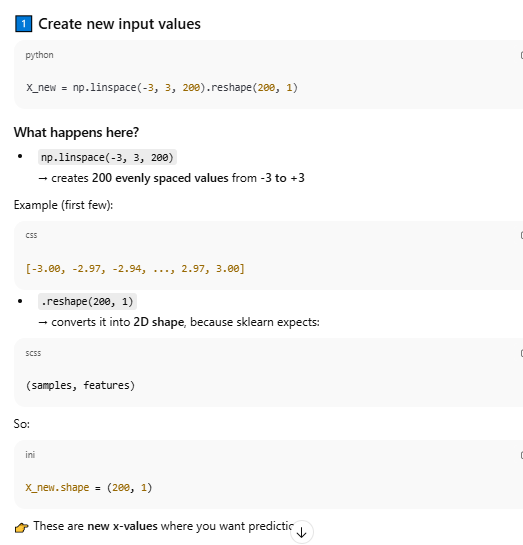

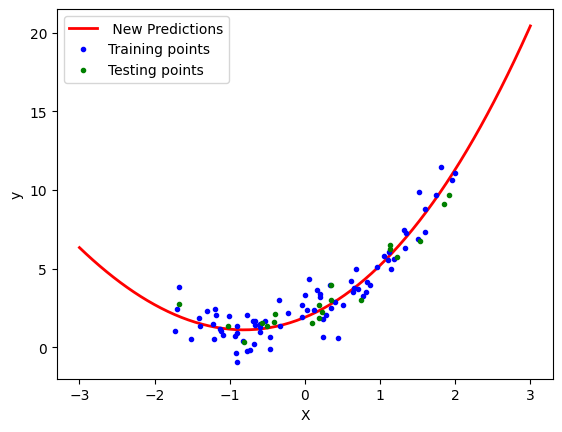

In [ ]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pipeline Concepts


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear regession
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

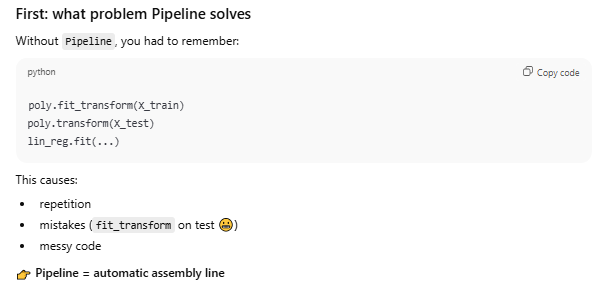

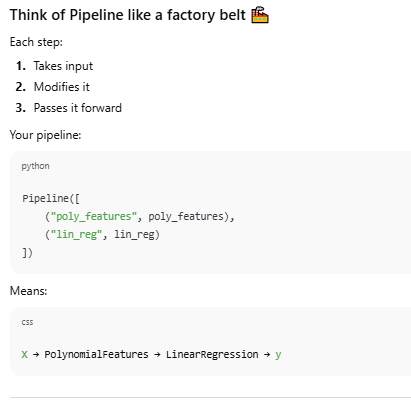

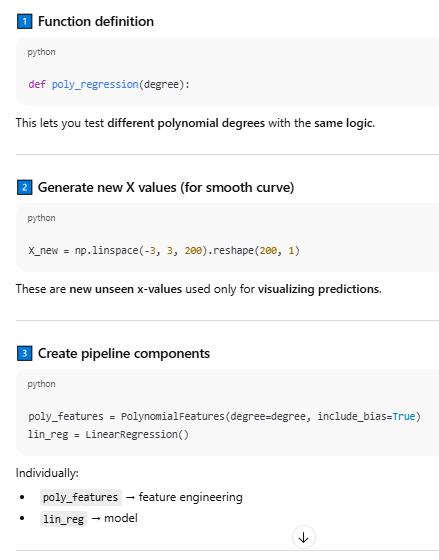


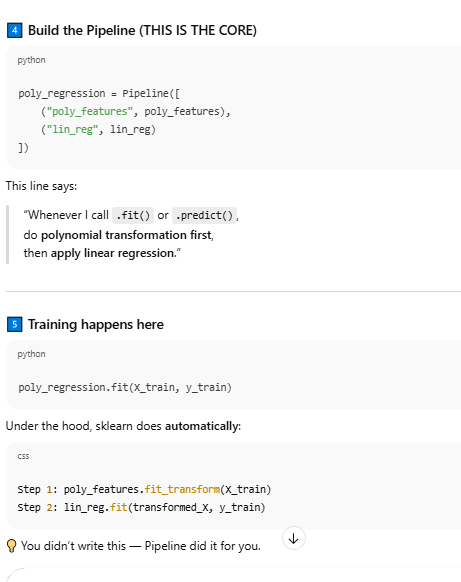


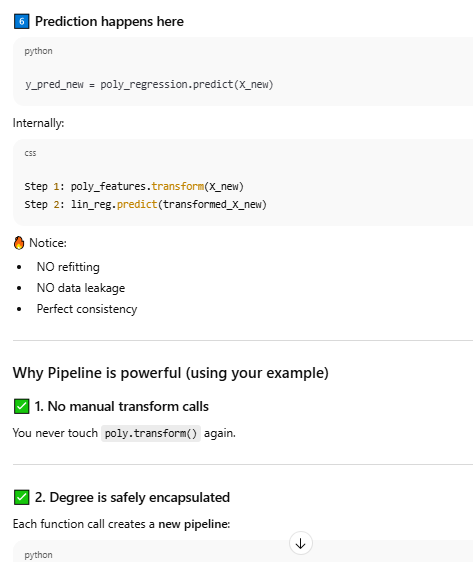

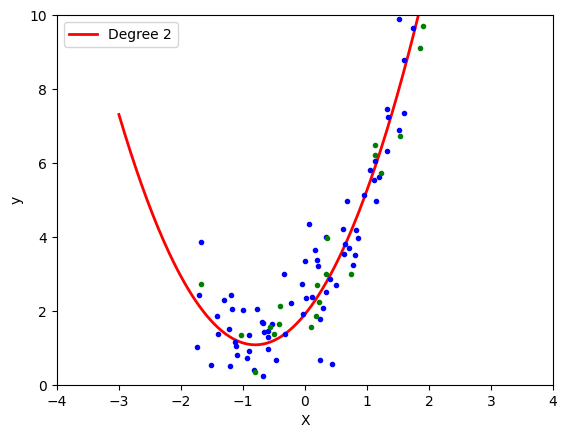

In [ ]:
poly_regression(2)

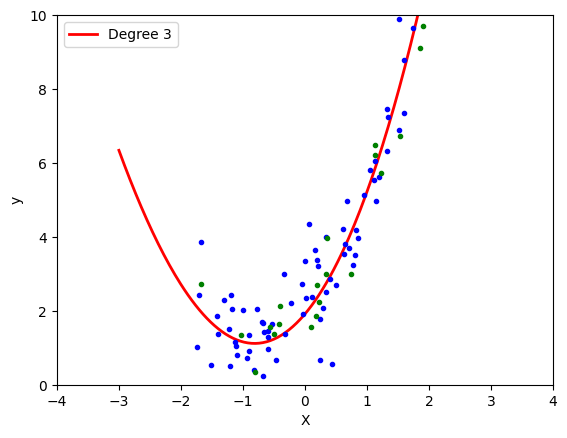

In [ ]:
poly_regression(3)

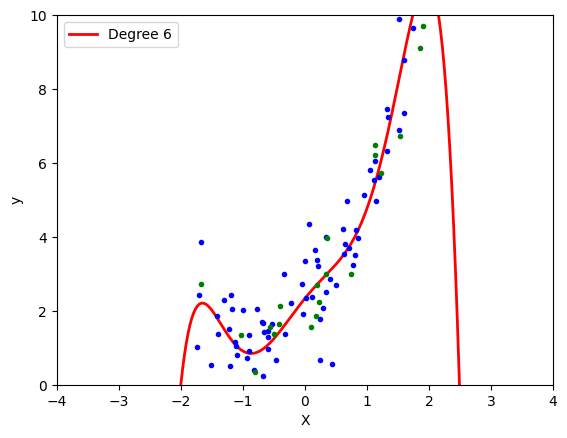

In [ ]:
poly_regression(6)    #see here overfitting started. As we will increase degree overfitting will happen

# Cross Validation Score

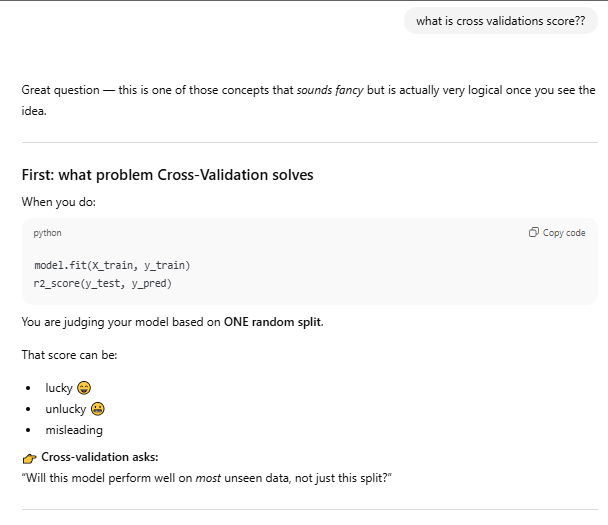
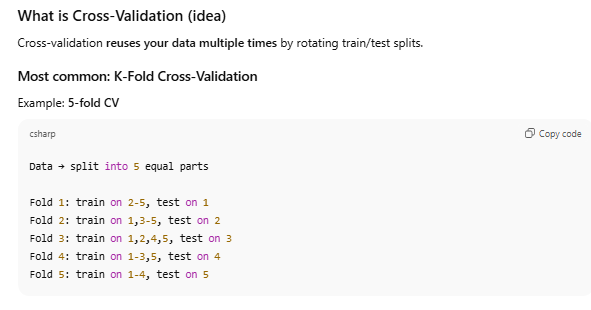
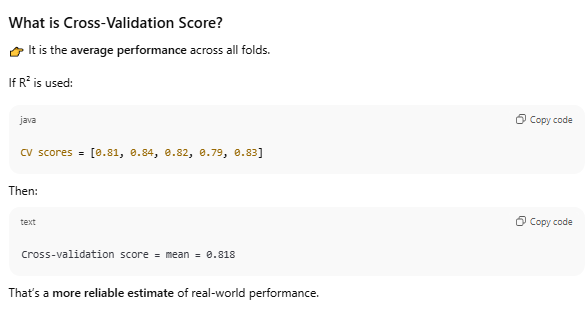
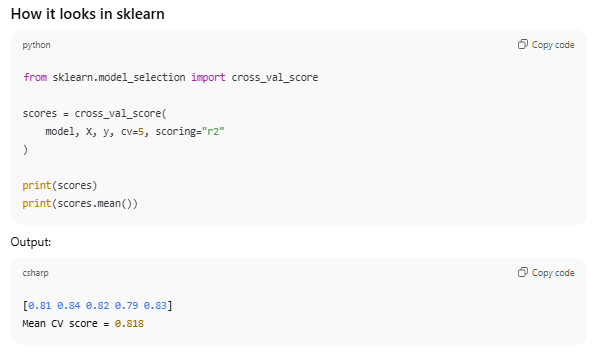